# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
## html_soup

In [6]:
table = html_soup.find('table', class_='table')

In [7]:
##table

In [8]:
# Extract all rows of data

data = []

rows = table.find_all('tr')



In [9]:
headers = [cell.text.strip() for cell in rows[0].find_all("th")]

print(headers)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [10]:
for row in rows[1:]:
    cells = row.find_all("td") 
    row_dict = {}
    for i in range(len(cells)):
        row_dict[headers[i]] = cells[i].text.strip()
    data.append(row_dict)
data

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [11]:
## print(data)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [12]:
# Create an empty list
weather_list = []
# Loop through the scraped data to create a list of rows
for row in data:
    weather_list.append(row)

## print(weather_list)  

In [13]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(weather_list, columns=["id","terrestrial_date","sol", "ls","month","min_temp","pressure"])

In [14]:
# Confirm DataFrame was created successfully
weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [16]:
# Change data types for data analysis

# MC - Change to Datetime
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])


In [17]:
# MC - Change other colums to int and float
weather_df = weather_df.astype({'id':'float','sol':'float','ls':'float','month':'float','min_temp':'float','pressure':'float'})

In [18]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                         float64
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
### MC - Explore weather_df

weather_df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


In [20]:
## weather_df

In [21]:
# 1. How many months are there on Mars?

#mars_months = ((weather_df. - weather_df.)/np.timedelta64(1, 'M'))
print("Below is the following number of Martian months: 12")
print(weather_df['month'].unique())

print("However, in reality there are about 24 Martian Months, the definition of 'Months' is incorrect or the data is wrong")

Below is the following number of Martian months: 12
[ 6.  7.  8.  9. 10. 11. 12.  1.  2.  3.  4.  5.]
However, in reality there are about 24 Martian Months, the definition of 'Months' is incorrect or the data is wrong


In [22]:
# 2. How many Martian days' worth of data are there?
martian_day_start = weather_df["sol"].min()
martian_day_end = weather_df["sol"].max()

martian_day_range = martian_day_end - martian_day_start
print("There are the following number of Martian days data:")
print(martian_day_range)

print(" ")

print("Note, the total number of samples is 1867 as shown in the summary statistics above.")

# Number Range of Martian Days (not Earth days) , available 
# elapsed sols (Martian days) since Curiosity landed on Mars

There are the following number of Martian days data:
1967.0
 
Note, the total number of samples is 1867 as shown in the summary statistics above.


In [23]:
# 3. What is the average low temperature by month?
low_month = weather_df.groupby(['month']).mean()
low_month_clean = low_month.drop(["id","sol","ls","pressure"], axis=1)
print("Below is the min_temp by month:")
low_month_clean

Below is the min_temp by month:


,min_temp
month,
1.0,-77.160920
2.0,-79.932584
3.0,-83.307292
4.0,-82.747423
5.0,-79.308725
6.0,-75.299320
7.0,-72.281690
8.0,-68.382979
9.0,-69.171642


<AxesSubplot:xlabel='month'>

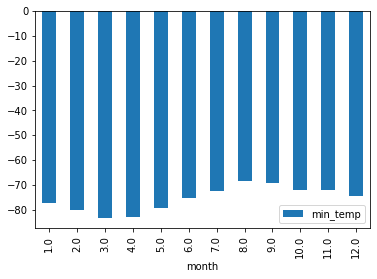

In [24]:
# Plot the average temperature by month

low_month_clean.plot(kind='bar')

In [25]:
# Identify the coldest and hottest months in Curiosity's location
print(low_month_clean.min())
print(low_month_clean.max())

print("                    ")

print("The coldest month is August (Month 8) at -83 degrees:")
print("The hottest month is April (Month 4) at -68 degrees:")

min_temp   -83.307292
dtype: float64
min_temp   -68.382979
dtype: float64
                    
The coldest month is August (Month 8) at -83 degrees:
The hottest month is April (Month 4) at -68 degrees:


In [26]:
# 4. Average pressure by Martian month
press_month = weather_df.groupby(['month']).mean()
press_month_clean = low_month.drop(["id","sol","ls","min_temp"], axis=1)
print("Below is the average pressure by month:")
press_month_clean

Below is the average pressure by month:


,pressure
month,
1.0,862.488506
2.0,889.455056
3.0,877.322917
4.0,806.329897
5.0,748.557047
6.0,745.054422
7.0,795.105634
8.0,873.829787
9.0,913.305970


In [27]:
# Identify the highest and lowest pressure months in Curiosity's location
print(press_month_clean.min())
print(press_month_clean.max())

print("                    ")

print("The lowest pressure month is June (Month 6) at 745.05:")
print("The highest pressure month is September (Month 9) at 913.31")

pressure    745.054422
dtype: float64
pressure    913.30597
dtype: float64
                    
The lowest pressure month is June (Month 6) at 745.05:
The highest pressure month is September (Month 9) at 913.31


<AxesSubplot:xlabel='month'>

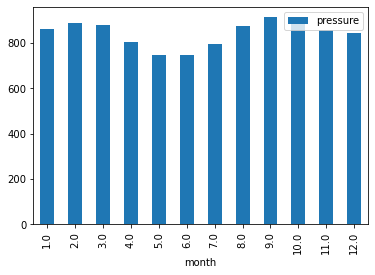

In [28]:
# Plot the average pressure by month
press_month_clean.plot(kind='bar')

In [29]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

Looking at the amount of terrestrial days between the peaks of temperature changes at day 725 the temperature peaks, then again at day 1425 the temperature peaks. We can infer this is the year based off of the temperature data. So taking 1425-725, we have about 700 terrestrial earth days in a martian year. Internet search confirms that a Mars year is equivalent to 687 earth days.


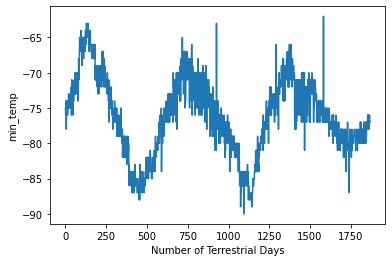

In [30]:
# 5. How many terrestrial (earth) days are there in a Martian year?

weather_df.min_temp.plot()
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("min_temp")

print("Looking at the amount of terrestrial days between the peaks of temperature changes at day 725 the temperature peaks, then again at day 1425 the temperature peaks. We can infer this is the year based off of the temperature data. So taking 1425-725, we have about 700 terrestrial earth days in a martian year. Internet search confirms that a Mars year is equivalent to 687 earth days.")


In [31]:
weather_df.dtypes

id                         float64
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV

weather_df.to_csv('mars_weather.csv', index=False)

In [33]:
browser.quit()